# ***Loan Prediction***

**import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, accuracy_score

**Load dataset**

In [2]:
df=pd.read_csv('/content/loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Data Preprocessing**

In [4]:
df.shape

(9578, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**Missing values in the dataset**

In [7]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# **Data Analysis and Visualization**

**Histogram**

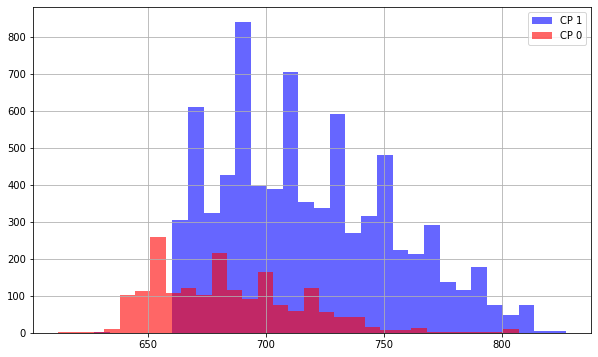

In [8]:
plt.figure(figsize=(10,6))
df[df['credit.policy'] == 1]['fico'].hist(bins = 30, color = 'blue', label = 'CP 1', alpha = 0.6)
df[df['credit.policy'] == 0]['fico'].hist(bins = 30, color = 'red', label = 'CP 0', alpha = 0.6)
plt.legend()

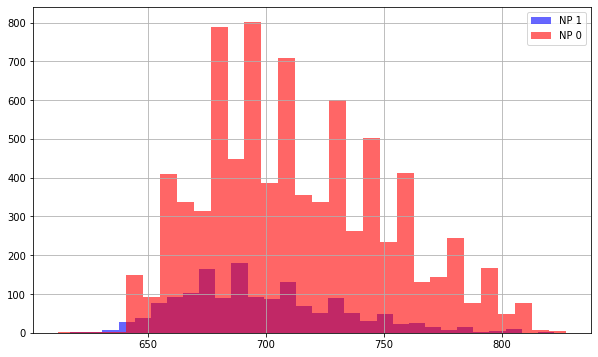

In [9]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid'] == 1]['fico'].hist(bins = 30, color = 'blue', label = 'NP 1', alpha = 0.6)
df[df['not.fully.paid'] == 0]['fico'].hist(bins = 30, color = 'red', label = 'NP 0', alpha = 0.6)
plt.legend()

**Countplot**

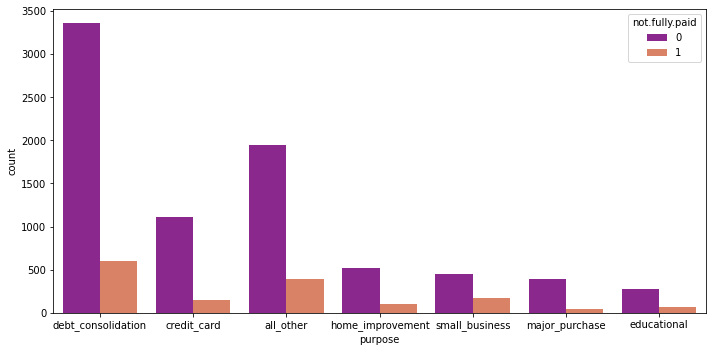

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'purpose', data = df, hue = 'not.fully.paid', palette='plasma')
plt.tight_layout()

**Relational Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


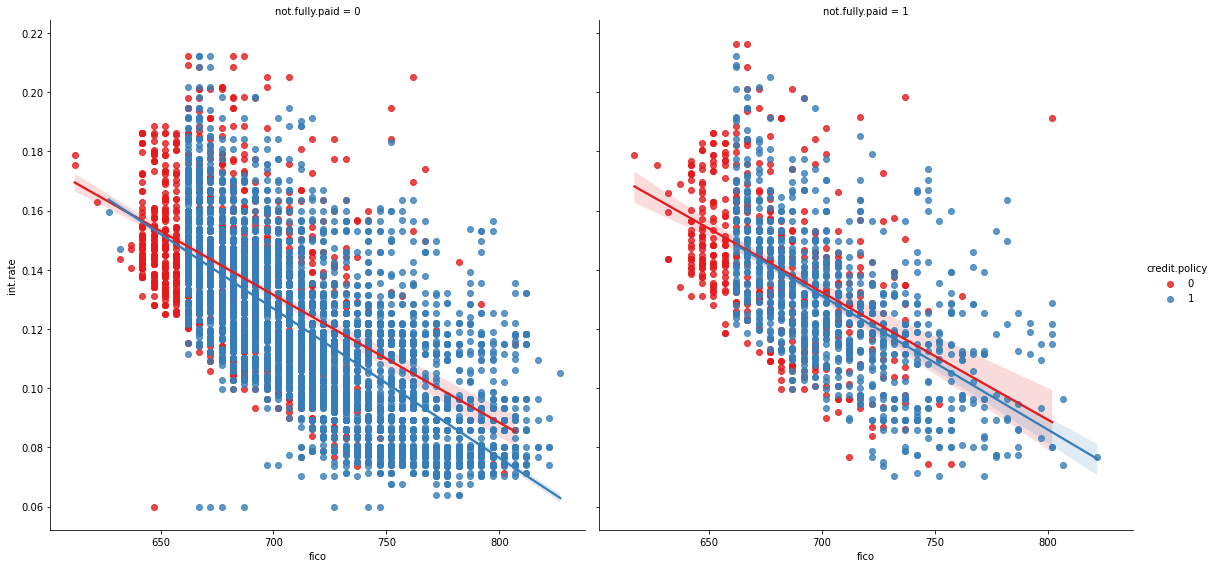

In [11]:
sns.lmplot(x = 'fico', y = 'int.rate', data = df, hue = 'credit.policy', col='not.fully.paid',palette = 'Set1', size = 8)


Positive examples = 1533
Negative examples = 8045
Proportion of positive to negative examples = 19.06%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


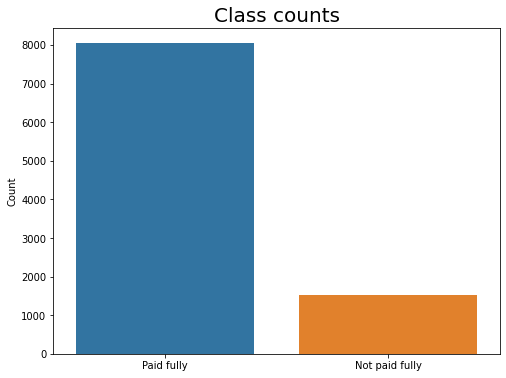

In [12]:
# Get number of positve and negative examples
pos = df[df["not.fully.paid"] == 1].shape[0]
neg = df[df["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

**Histogram of numeric features**

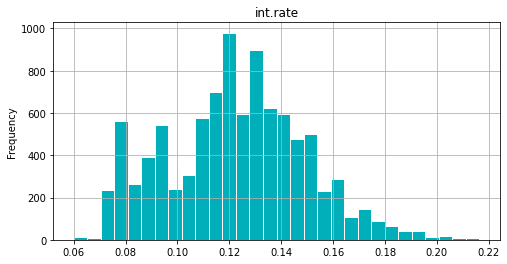

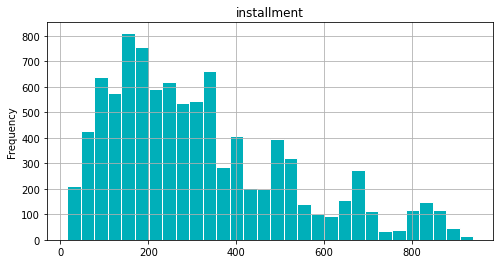

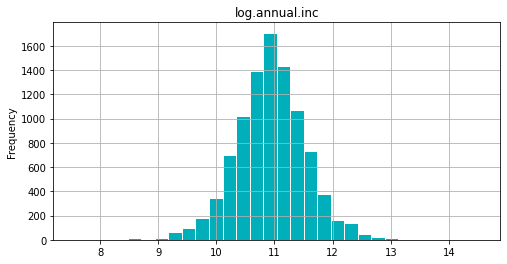

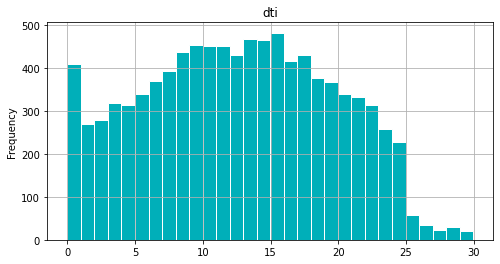

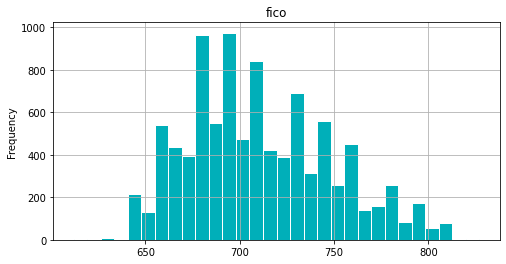

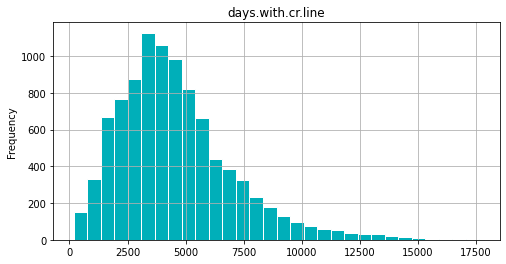

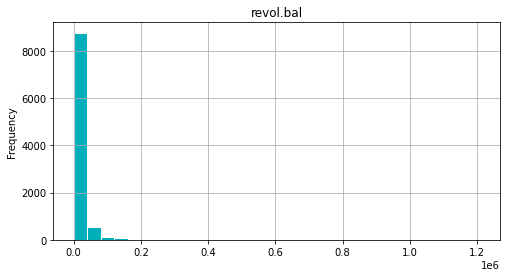

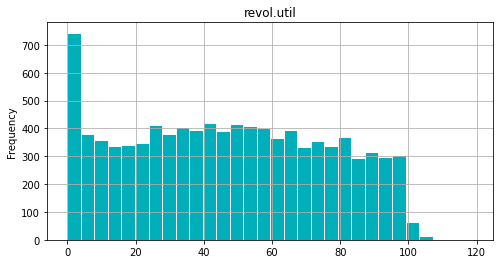

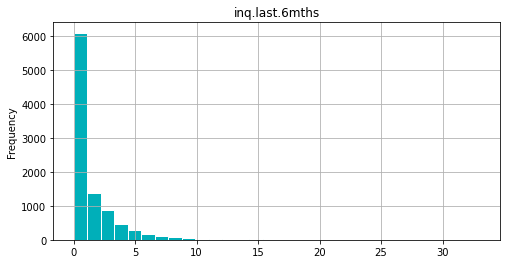

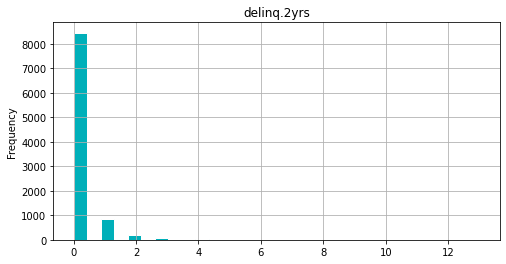

In [13]:

numeric = ['int.rate', 'installment', 'log.annual.inc',
                'dti', 'fico', 'days.with.cr.line',
                'revol.bal', 'revol.util',
                'inq.last.6mths', 'delinq.2yrs']
# plot distribution of numerical features
for f in numeric:
    plt.figure(figsize=(8,4))
    df[f].plot(kind='hist', bins=30,edgecolor='white', color='#00afb9')
    plt.title(f)
    plt.grid()
    plt.show()

**Bar-plot**

**Analysis of Categorical Features**

In [14]:
categorical_features = ['credit.policy', 'purpose', 'pub.rec']

In [15]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


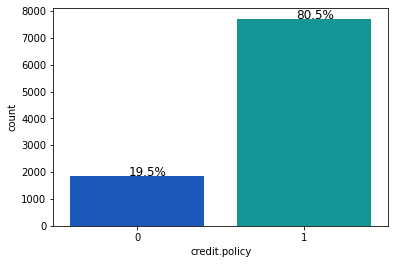

In [16]:
#Build barplot for DELINQ


ax = sns.countplot(df["credit.policy"],palette='winter')
perc_on_bar(ax,df["credit.policy"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


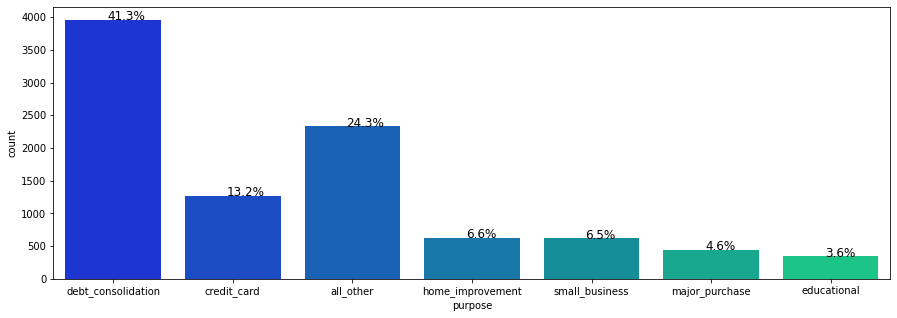

In [17]:

plt.figure(figsize=(15,5))
ax = sns.countplot(df["purpose"],palette='winter')
perc_on_bar(ax,df["purpose"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


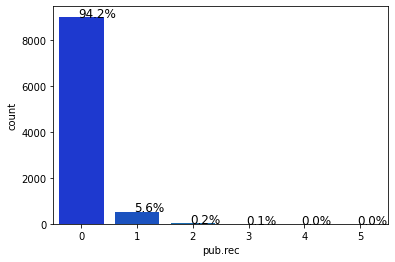

In [18]:

ax = sns.countplot(df["pub.rec"],palette='winter')
perc_on_bar(ax,df["pub.rec"])

**Stacked Bar-Plot**

**Target vs Categorical features**

In [19]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['not.fully.paid'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['not.fully.paid'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

not.fully.paid         0     1   All
purpose                             
all_other           1944   387  2331
credit_card         1116   146  1262
debt_consolidation  3354   603  3957
educational          274    69   343
home_improvement     522   107   629
major_purchase       388    49   437
small_business       447   172   619
All                 8045  1533  9578
------------------------------------------------------------------------------------------------------------------------


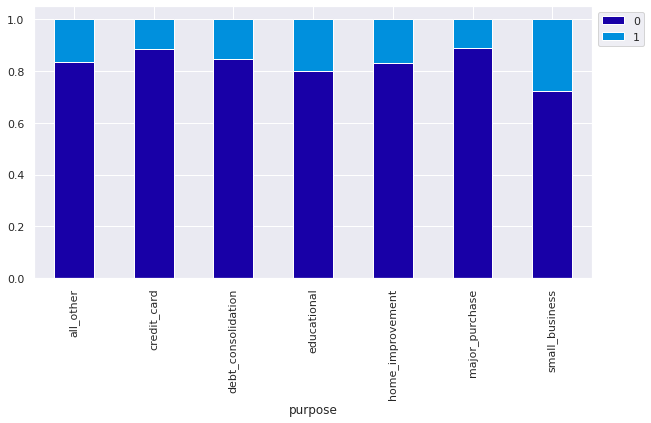

In [20]:
# Plot stacked bar plot for purpose
stacked_plot(df['purpose'])

not.fully.paid     0     1   All
credit.policy                   
0               1349   519  1868
1               6696  1014  7710
All             8045  1533  9578
------------------------------------------------------------------------------------------------------------------------


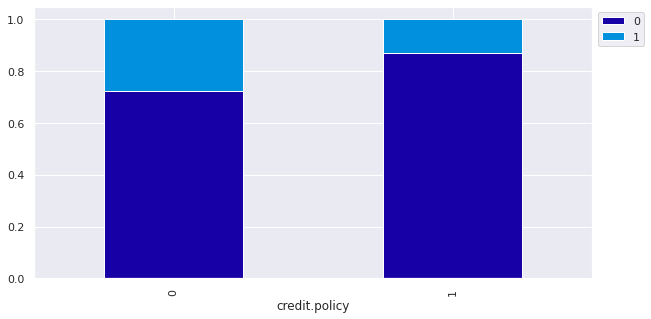

In [21]:
# Plot stacked bar plot for credit.policy
stacked_plot(df['credit.policy'])

not.fully.paid     0     1   All
pub.rec                         
0               7624  1395  9019
1                397   136   533
2                 17     2    19
3                  5     0     5
4                  1     0     1
5                  1     0     1
All             8045  1533  9578
------------------------------------------------------------------------------------------------------------------------


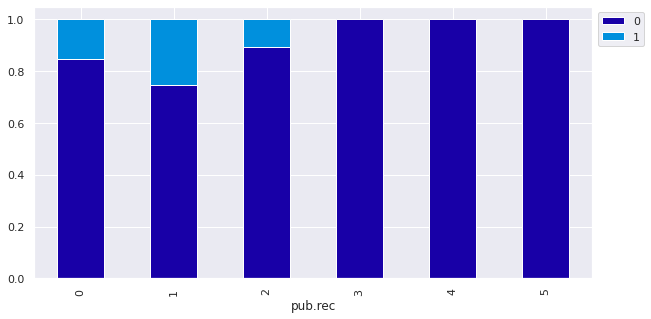

In [22]:

# Plot stacked bar plot for pub.rec
stacked_plot(df['pub.rec'])

**Pie Chart**

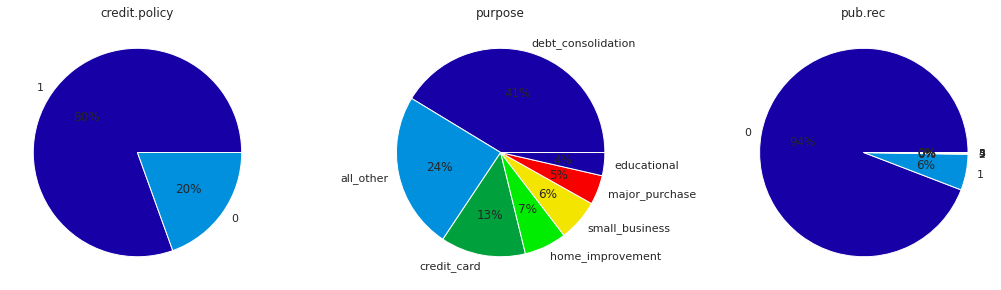

In [23]:
# Overall Categorical data distribution
plt.figure(figsize=(20,8))
for index, col in enumerate(categorical_features, start=1):
    plt.subplot(2,4,index)
    plt.title(col)
    plt.pie(df[col].value_counts().values,autopct='%1.0f%%', labels=df[col].value_counts().index)
plt.tight_layout()

**Staitistics Of Data**

In [24]:
# Analysing validity of default Mathemetical Outlier Removal techniques
# IQR Ranges
Q1 = df[numeric].quantile(0.25)
Q3 = df[numeric].quantile(0.75)
IQR = Q3-Q1

lower_range = Q1 - 1.5*IQR
upper_range = Q3 + 1.5*IQR
iqr_range = pd.DataFrame(pd.concat([lower_range,upper_range], axis=1))
iqr_range.columns = ['IQR Lower','IQR Upper']

# Z-score range
means = df[numeric].mean()
stds = df[numeric].std()

lower_zscore = means - 3*stds
upper_zscore = means + 3*stds
z_range = pd.DataFrame(pd.concat([lower_zscore,upper_zscore], axis=1))
z_range.columns =['Z Lower','Z Upper']

# Both Into DataFrame
pd.concat([iqr_range,z_range], axis=1)

,IQR Lower,IQR Upper,Z Lower,Z Upper
int.rate,0.048700,0.195900,0.042099,0.203181
installment,-239.718750,836.251250,-302.124491,940.303318
log.annual.inc,9.459094,12.390612,9.087679,12.776555
dti,-8.893750,34.056250,-8.045230,33.258587
fico,599.500000,819.500000,596.934703,824.757926
days.with.cr.line,-1545.000000,10095.000000,-2930.023934,12051.558327
revol.bal,-19406.750000,40843.250000,-84354.604796,118182.532547
revol.util,-49.850000,143.350000,-40.244015,133.842487
inq.last.6mths,-3.000000,5.000000,-5.023267,8.178205
delinq.2yrs,0.000000,0.000000,-1.474936,1.802353


# **Feature Engineering**

In [25]:
df["days.with.cr.line"].value_counts()

3660.000000     50
3630.000000     48
3990.000000     46
4410.000000     44
3600.000000     41
                ..
9395.000000      1
5613.958333      1
2884.000000      1
1728.000000      1
10474.000000     1
Name: days.with.cr.line, Length: 2687, dtype: int64

In [26]:
# Turn Applicant Income into Categorical Feature
bins=[0,1000,3000,4000,7000]
group=['Low','Average','High', 'Very high']
df['credit_line_category'] = pd.cut(df['days.with.cr.line'],bins,labels=group)

In [27]:
df['credit_line_category']

0       Very high
1         Average
2       Very high
3         Average
4       Very high
          ...    
9573          NaN
9574    Very high
9575         High
9576      Average
9577    Very high
Name: credit_line_category, Length: 9578, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very high']

# **Feature selection**

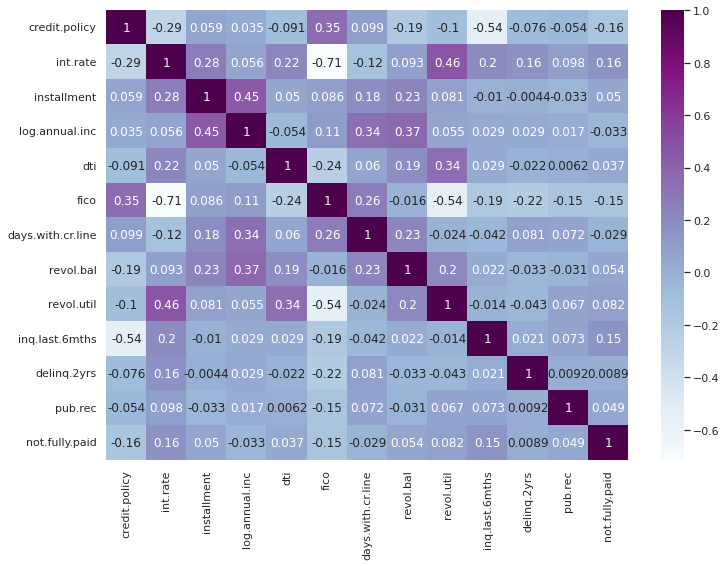

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="BuPu")

**Independent and Dependent Features**

In [29]:

x=df[['credit.policy','int.rate','dti','inq.last.6mths','revol.util','delinq.2yrs']]
y=df['not.fully.paid']

**Train Test Splitting**

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.3)


**Shape of Training and Testing**

In [31]:
print("shape of train test splitting")
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

shape of train test splitting


((6704, 6), (2874, 6), (6704,), (2874,))

# **Modeling**

**Neural Network**

In [35]:
model=keras.Sequential([layers.Dense(units=108,activation='relu',input_shape=[6,]),
                        layers.BatchNormalization(),
                        layers.Dropout(0.3),
                        layers.Dense(units=324,activation='relu'),
                        layers.BatchNormalization(),
                        layers.Dropout(0.3),
                        layers.Dense(units=648,activation='relu'),
                        layers.BatchNormalization(),
                        layers.Dropout(0.3),
                        layers.Dense(units=1296,activation='relu'),
                        layers.BatchNormalization(),
                        layers.Dropout(0.3),
                        layers.Dense(units=1,activation='sigmoid')])






In [36]:


sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile( loss = "binary_crossentropy", 
               optimizer = sgd, 
               metrics=['accuracy']
             )

In [37]:
early_stop=callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)
history = model.fit(
    xtrain, ytrain,
    validation_data=(xtest, ytest),
    callbacks=[early_stop],
    batch_size=32,
    epochs=40,
    verbose=1
)

Epoch 1/40
210/210 [==============================] - 4s 8ms/step - loss: 0.7006 - accuracy: 0.6444 - val_loss: 0.4733 - val_accuracy: 0.8386
Epoch 2/40
210/210 [==============================] - 1s 7ms/step - loss: 0.5337 - accuracy: 0.7686 - val_loss: 0.4450 - val_accuracy: 0.8389
Epoch 3/40
210/210 [==============================] - 2s 7ms/step - loss: 0.4899 - accuracy: 0.8040 - val_loss: 0.4469 - val_accuracy: 0.8372
Epoch 4/40
210/210 [==============================] - 3s 13ms/step - loss: 0.4840 - accuracy: 0.8162 - val_loss: 0.4373 - val_accuracy: 0.8375
Epoch 5/40
210/210 [==============================] - 3s 14ms/step - loss: 0.4859 - accuracy: 0.8216 - val_loss: 0.4435 - val_accuracy: 0.8365
Epoch 6/40
210/210 [==============================] - 3s 14ms/step - loss: 0.4672 - accuracy: 0.8250 - val_loss: 0.4350 - val_accuracy: 0.8386
Epoch 7/40
210/210 [==============================] - 3s 14ms/step - loss: 0.4670 - accuracy: 0.8255 - val_loss: 0.4371 - val_accuracy: 0.8372
Ep

**Prediction**

In [38]:
ypred=model.predict(xtest)

In [39]:
ypred=(ypred>0.5)

# **Evaluate Performance**

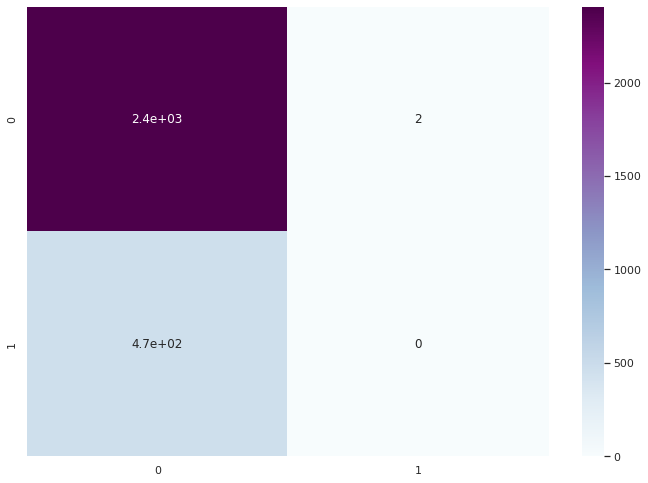

In [40]:
cm=confusion_matrix(ytest, ypred)
sns.heatmap(cm,annot=True,cmap="BuPu")


**Accuracy Of Model**

In [41]:
acc=accuracy_score(ytest,ypred)
print("The Accuracy of ANN is ",acc)

The Accuracy of ANN is  0.837160751565762


**Plot the Accuracy of Model**

In [42]:
acc = history.history['accuracy']

loss = history.history['loss']



<Figure size 842.4x595.44 with 0 Axes>

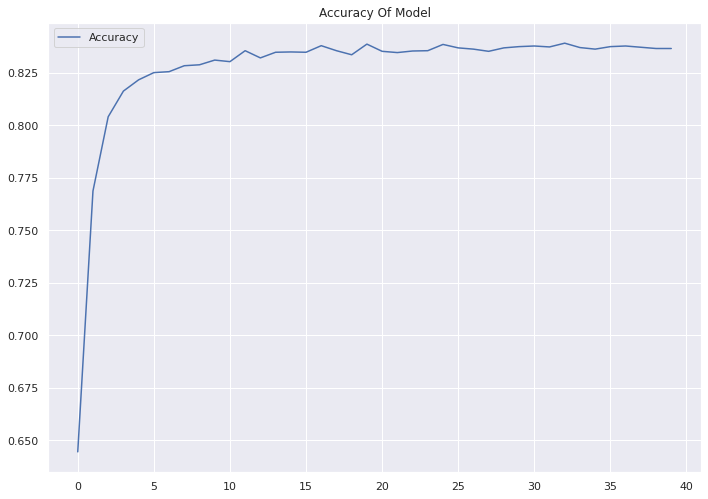

<Figure size 842.4x595.44 with 0 Axes>

In [43]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Accuracy')

plt.title("Accuracy Of Model")
plt.legend()
plt.figure()

<Figure size 842.4x595.44 with 0 Axes>

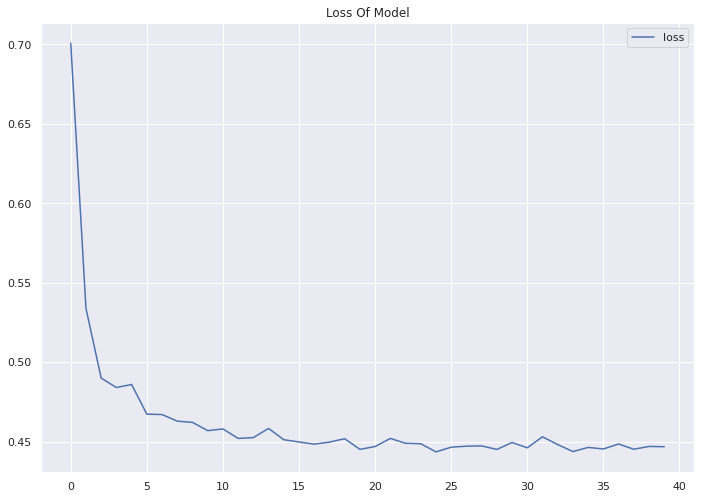

<Figure size 842.4x595.44 with 0 Axes>

In [44]:
plt.plot(epochs, loss, 'b', label='loss')
plt.title('Loss Of Model')
plt.legend()
plt.figure()